# Importing Netflix movies txt data and converting to DataFrame

In [1]:
import os
import pandas as pd
import numpy as np

# Reading all the txt files in the folder and storing them in a csv file

if not os.path.isfile('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/data.csv'):
    data = open('data.csv', mode='w')
    
    row = list()
    files = [
        'C:/Users/gatea/Documents/Machine Learning Projects/Netflix/combined_data_1.txt',
        ]
    for file in files:
        print("Reading ratings from {}\n".format(file))
        with open(file) as f:
            for line in f: 
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
    data.close()
    
df = pd.read_csv('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/data.csv', sep=',', 
    names=['movieid', 'user', 'rating', 'date'])

df.date = pd.to_datetime(df.date)
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['day'] = pd.DatetimeIndex(df['date']).day
df.head()

,movieid,user,rating,date,month,year,day
0,1,1488844,3,2005-09-06,9,2005,6
1,1,822109,5,2005-05-13,5,2005,13
2,1,885013,4,2005-10-19,10,2005,19
3,1,30878,4,2005-12-26,12,2005,26
4,1,823519,3,2004-05-03,5,2004,3


# Merging movies dataset to map Movie names to Movie ids

In [2]:
movie_data = pd.read_csv('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/movie_titles.csv', encoding=('latin-1'))

df=pd.merge(df, movie_data, how='left', on=['movieid'])
df = df.loc[df['month']==12]
df = df.loc[df['day']==25]
df.head()

,movieid,user,rating,date,month,year,day,movieyear,moviename
2946,5,162804,5,2004-12-25,12,2004,25,2004.0,The Rise and Fall of ECW
3425,5,2461719,4,2004-12-25,12,2004,25,2004.0,The Rise and Fall of ECW
4123,6,2209618,3,2003-12-25,12,2003,25,1997.0,Sick
4558,6,539019,5,2005-12-25,12,2005,25,1997.0,Sick
8464,8,349234,1,2005-12-25,12,2005,25,2004.0,What the #$*! Do We Know!?


# Subsetting dataset to identify Customers and the Movies watched by them

In [3]:
col=['movieid', 'rating', 'date', 'month', 'year', 'day','movieyear'] 
#dropping unwanted col
df2=df.drop(columns=col, axis=1)
df2.set_index('user')
df2.head()

,user,moviename
2946,162804,The Rise and Fall of ECW
3425,2461719,The Rise and Fall of ECW
4123,2209618,Sick
4558,539019,Sick
8464,349234,What the #$*! Do We Know!?


# Converting to list

In [5]:
movies = df2.groupby('user')['moviename'].apply(list).tolist()

# Importing necessary libraries

In [6]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Encoding Dataset

In [7]:
encoder = TransactionEncoder().fit(movies)
onehot = encoder.transform(movies)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()

,'N Sync: Making of the Tour,'N Sync: PopOdyssey Live,...And Justice for All,...And Then Came Summer,.hack//SIGN,10,10 Things I Hate About You,10.5,101 Dalmatians II: Patch's London Adventure,11-Sep,...,Zatoichi the Outlaw,Zatoichi's Conspiracy,Zatoichi: The Festival of Fire,Zeus and Roxanne,Zhou Yu's Train,Ziegfeld Girl,Zig Zag: Special Edition,Zombie,Zorro,s-Cry-ed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Applying Apriori Algorithm

### Deriving qualified rules

In [8]:
frequent_items = apriori(onehot, min_support = 0.005, max_len = 4, use_colnames = True)
print(len(frequent_items))
frequent_items.head()

244


,support,itemsets
0,0.005377,(2 Fast 2 Furious)
1,0.006925,(28 Days Later)
2,0.013850,(50 First Dates)
3,0.011977,(A Beautiful Mind)
4,0.007007,(A Bug's Life)


In [9]:
rules = association_rules(frequent_items, metric = 'support', min_threshold = 0.005)
print(len(rules))
rules

22


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Billy Madison),(Happy Gilmore),0.010510,0.019554,0.005866,0.558140,28.544186,0.005661,2.218905
1,(Happy Gilmore),(Billy Madison),0.019554,0.010510,0.005866,0.300000,28.544186,0.005661,1.413557
2,(The Bourne Identity),(Catch Me If You Can),0.015969,0.014828,0.005540,0.346939,23.397399,0.005303,1.508544
3,(Catch Me If You Can),(The Bourne Identity),0.014828,0.015969,0.005540,0.373626,23.397399,0.005303,1.570997
4,(Collateral),(I),0.032915,0.026805,0.005377,0.163366,6.094706,0.004495,1.163228
5,(I),(Collateral),0.026805,0.032915,0.005377,0.200608,6.094706,0.004495,1.209775
6,(Miss Congeniality),(Entrapment),0.023709,0.014991,0.006192,0.261168,17.421635,0.005837,1.333198
7,(Entrapment),(Miss Congeniality),0.014991,0.023709,0.006192,0.413043,17.421635,0.005837,1.663311
8,(Men of Honor),(Miss Congeniality),0.013199,0.023709,0.006925,0.524691,22.130796,0.006612,2.054016
9,(Miss Congeniality),(Men of Honor),0.023709,0.013199,0.006925,0.292096,22.130796,0.006612,1.393977


### Visualizing support metric

C:\Users\gatea\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\gatea\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

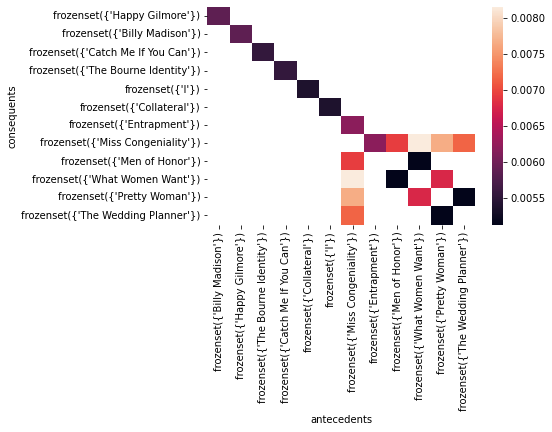

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

support_table = rules.pivot(index = 'consequents', columns = 'antecedents', values = 'support')
sns.heatmap(support_table)

### Adding Zhang's metric to the dataset

In [11]:
rules.insert(8,'Zhang metric',0)
rules['Zhang metric'] = rules.apply(lambda x : ((x['support'] - x['antecedent support'] * x['consequent support']) / max((x['support']*(1 - x['antecedent support'])), (x['antecedent support'] * x['consequent support'] - x['consequent support']))), axis=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,Zhang metric,conviction
0,(Billy Madison),(Happy Gilmore),0.010510,0.019554,0.005866,0.558140,28.544186,0.005661,0.975216,2.218905
1,(Happy Gilmore),(Billy Madison),0.019554,0.010510,0.005866,0.300000,28.544186,0.005661,0.984211,1.413557
2,(The Bourne Identity),(Catch Me If You Can),0.015969,0.014828,0.005540,0.346939,23.397399,0.005303,0.972794,1.508544
3,(Catch Me If You Can),(The Bourne Identity),0.014828,0.015969,0.005540,0.373626,23.397399,0.005303,0.971668,1.570997
4,(Collateral),(I),0.032915,0.026805,0.005377,0.163366,6.094706,0.004495,0.864374,1.163228
5,(I),(Collateral),0.026805,0.032915,0.005377,0.200608,6.094706,0.004495,0.858947,1.209775
6,(Miss Congeniality),(Entrapment),0.023709,0.014991,0.006192,0.261168,17.421635,0.005837,0.965491,1.333198
7,(Entrapment),(Miss Congeniality),0.014991,0.023709,0.006192,0.413043,17.421635,0.005837,0.956946,1.663311
8,(Men of Honor),(Miss Congeniality),0.013199,0.023709,0.006925,0.524691,22.130796,0.006612,0.967585,2.054016
9,(Miss Congeniality),(Men of Honor),0.023709,0.013199,0.006925,0.292096,22.130796,0.006612,0.978001,1.393977


## Thus, we can determine the probability 'if Antecedent then Consequent' to suggest relevant movies to the user based on the Apriori algorithm metrics (support, confidence, lift, leverage and Zhang's metric)